# [Table 1] Proximity of PMIP3 traces to LMR ensembles

Let's apply the notion of plume distance to PMIP3 runs and the offline LMR. This reproduces Table 1 from the paper (minus the bolding of compatible values, which was done by hand).

In [1]:
import pandas as pd
import pens
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyleoclim as pyleo
plt.style.use('default')
pens.set_style()

## LMR offline

Any probablistic estimate of a time-varying series results in not just one "best" estimate, but a distribution whose characteristics (e.g. location, scale, symmetry) are time-dependent. One example of this is the output of an Ensemble Kalman Filter like the [Last Millennium Reanalysis, v2.1](https://doi.org/10.5194/cp-15-1251-2019). Let us load the data and plot their distribution over time:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'LMR v2.1'}, xlabel='time', ylabel='GMST [°C]'>)

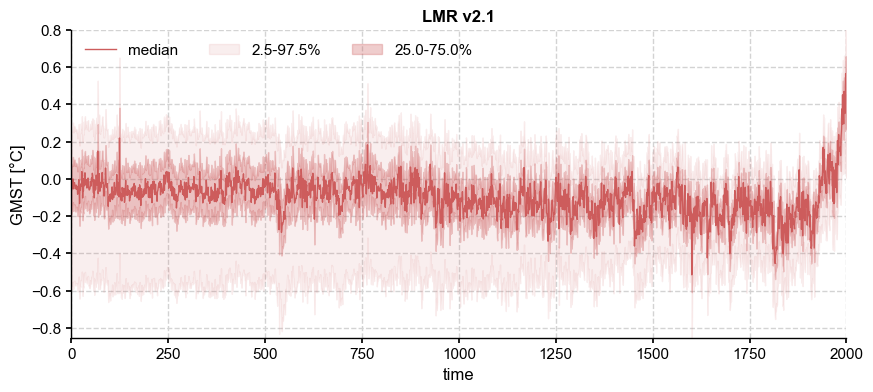

In [2]:
path = '../data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
ens_off = pens.EnsembleTS().load_nc(path, var='gmt')
ens_off.label = 'LMR v2.1'
ens_off.value_name = 'GMST'
ens_off.value_unit = '\N{DEGREE SIGN}C'
ens_off.plot_qs()

## LMRonline

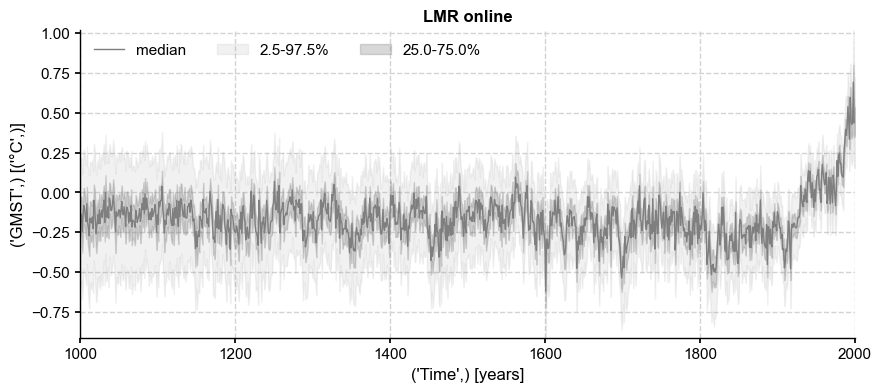

In [3]:
ens_on = pens.EnsembleTS().load_nc('../data/gmt_MCruns_ensemble_full_LMRonline.nc', var='glob_mean', time_name='year')
ens_on.label = 'LMR online'
ens_on.time_unit = 'years'
ens_on.time_name='Time',            # optional metadata: the name of the time axis
ens_on.value_name='GMST',     # optional metadata: the name of the value axis
ens_on.value_unit='\N{DEGREE SIGN}C',      

fig, ax = ens_on.plot_qs(color = 'tab:gray')

Subsample to align to LMR offline

In [4]:
ens_o2000 = ens_on.subsample(nsamples=ens_off.nEns)

## PMIP3 simulations
Let us load and plot the data first:

In [5]:
df = pd.read_table('../data/PMIP3_GMST.txt')
# create a new pandas.DataFrame to store the processed data
dfn = df.copy()

# remove the data columns for CESM and GISS ensemble members
for i in range(10):
    dfn = dfn.drop([f'CESM_member_{i+1}'], axis=1)
    
dfn = dfn.drop(['GISS-E2-R_r1i1p127.1'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p127'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p121'], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
dfn['CESM'] = df[[
    'CESM_member_1',
    'CESM_member_2',
    'CESM_member_3',
    'CESM_member_4',
    'CESM_member_5',
    'CESM_member_6',
    'CESM_member_7',
    'CESM_member_8',
    'CESM_member_9',
    'CESM_member_10',
]].mean(axis=1)

dfn['GISS'] = df[[
    'GISS-E2-R_r1i1p127.1',   
    'GISS-E2-R_r1i1p127',
    'GISS-E2-R_r1i1p121',
]].mean(axis=1)

# display the processed data
dfn

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


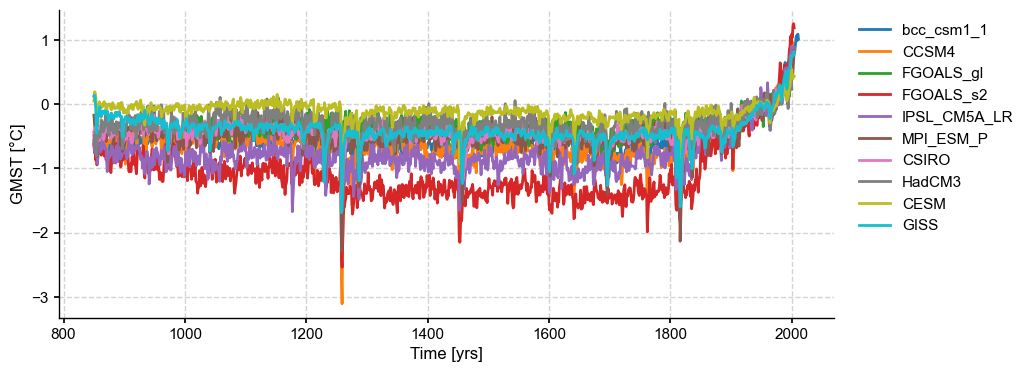

In [6]:
# store each pyleoclim.Series() object into a dictionary and plot
ts_dict = {}
for name in dfn.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=dfn['Year'].values,  # the time axis
        value=dfn[name].values,   # the value axis
        label=name,                  # optional metadata: the nickname of the series
        time_name='Time',            # optional metadata: the name of the time axis
        time_unit='yrs',             # optional metadata: the unit of the time axis
        value_name='GMST',     # optional metadata: the name of the value axis
        value_unit='\N{DEGREE SIGN}C',              # optional metadata: the unit of the value axis
        verbose = False,
    )

ts_list = [v for k, v in ts_dict.items()]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)
fig, ax = ms_pmip.plot(lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    })

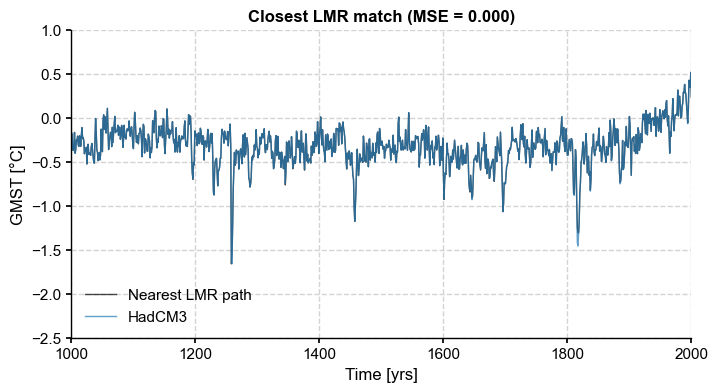

In [7]:
common_time = [1000, 2000]
lmr_slice = ens_off.slice(common_time)
HadCM3 = ts_list[7].slice(common_time)
CCSM4 = ts_list[1].slice(common_time)
path_nearest = lmr_slice.sample_nearest(HadCM3.value, metric='MSE')
dist = path_nearest.distance  # extract distance metric
fig, ax = path_nearest.plot(figsize=(8,4),
    title='Closest LMR match (MSE = {:4.3f})'.format(dist),
    color='k', label='Nearest LMR path', alpha=0.7,
)

HadCM3.plot(ax=ax, ylim=(-2.5, 1), alpha=0.7, linewidth=1)
ax.legend(loc='lower left', ncol=1)
ax.set_xlim(common_time)
fig.savefig('../figures/closest_match_HadCM3.pdf')

## Resampled trajectories
For this, we need proper ensemble trajectories, so we resample the LMR offline ensemble in 3 ways:
- an autoregressive model (AR(2)) fit to the online LMR ensemble
- fractional Gaussian noise (fGn)
- power-law behavior

### AR model parameters

The AR(p) model for the mean writes $X_t = \sum_{\ell=1}^p \phi_\ell X_{t-\ell} + \epsilon_t$, where  $\epsilon$ is Gaussian, i.i.d. with variance $\sigma^2$ and mean zero, and $\phi_\ell$ is the autocorrelation at lag $\ell= 1, \dots, p$. We load the parameters fitted to LMRonline (Perkins & Hakim, 2021) with [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.fit.html#statsmodels.tsa.ar_model.AutoReg.fit):

In [8]:
ar_params = pd.read_csv('../data/LMRonline_ARfit.csv',index_col=0)
ar_params.head()

,φ0,φ1,φ2,φ3,φ4,var
ens member,,,,,,
0,0.051950,0.459652,0.167199,0.046081,0.073954,0.582262
1,-0.002925,0.337561,0.320492,0.065557,0.094333,0.495418
2,-0.040660,0.610942,0.088920,0.040907,0.061450,0.450393
3,0.063021,0.365478,0.277480,-0.030457,0.066657,0.671342
4,-0.166564,0.269797,0.324987,0.150546,-0.015932,0.626581


In [9]:
phi_m = ar_params.mean().to_numpy()[:-3] # take the mean model (dumb, but a start)
paths_ar = lmr_slice.random_paths(model='ar',param=phi_m,p=ens_off.nEns)
beta_o = 0.93
paths_pl = lmr_slice.random_paths(model='power-law',param=beta_o,p=ens_off.nEns)
hurst = (beta_o+1)/2
paths_fGn = lmr_slice.random_paths(model='fGn',param=hurst,p=ens_off.nEns)

100%|██████████| 2000/2000 [00:00<00:00, 10722.20it/s]


Let's apply proximity probability to these resampled ensembles

In [10]:
dist_pl = paths_pl.distance()

Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:07<00:00, 252116.41it/s]


<Axes: ylabel='Count'>

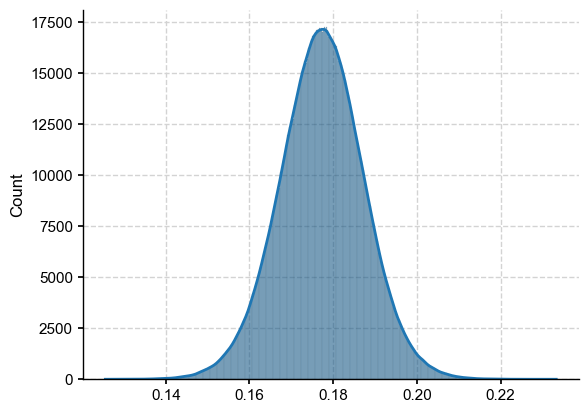

In [11]:
import seaborn as sns
sns.histplot(dist_pl,kde=True)

## Effects of resampling: the Grand Table

### Benchmarks:

In [12]:
N = ens_off.nEns
npairs = int(N*(N-1)/2)
intra_ens_dist = np.empty((4,npairs))
intra_ens_dist[0,:] = ens_o2000.distance()
intra_ens_dist[1,:] = paths_ar.distance()
intra_ens_dist[2,:] = paths_fGn.distance()
intra_ens_dist[3,:] = paths_pl.distance()

Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:05<00:00, 371520.73it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 241574.97it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 245245.44it/s]
Computing intra-ensemble distance among possible pairs: 100%|██████████| 1999000/1999000 [00:08<00:00, 243173.15it/s]


In [13]:
#qs = [0.9, 0.95, 0.99]
q95 = np.empty((4,1))
for i in range(4):
    q95[i,:] = np.quantile(intra_ens_dist[i,:],0.95)     
    #print(f'{q95[i,:]:.2f}')

In [14]:
print(q95)

[[0.25746134]
 [0.18425562]
 [0.19637196]
 [0.19365803]]


### Plume Distances

PUT INTO ND array!

In [15]:
common = [1000, 1998] # FGOALS is ruining it for everyone else.
ensembles = ['ens_on','paths_ar','paths_fGn','paths_pl']
pmip3_plume_dist = np.empty((4,2,len(ts_list)))
for i, ts in enumerate(ms_pmip.series_list):
    ts_lm = ts.slice(common)
    for k, ens in enumerate(ensembles):
        delta_eps50_m, delta_eps50_hdi = eval(ens).slice(common).plume_distance(y=ts_lm.value, spread_stat='HDI')
        print(f"HDI for {ens},{ts_lm.label} is {delta_eps50_hdi}")
        pmip3_plume_dist[k,0,i] = delta_eps50_m
        pmip3_plume_dist[k,1,i] = (delta_eps50_hdi[0] <= q95[k])
        

HDI for ens_on,bcc_csm1_1 is [0.3169023  0.48872373]
HDI for paths_ar,bcc_csm1_1 is [0.41504097 0.42824128]
HDI for paths_fGn,bcc_csm1_1 is [0.40244935 0.44500142]
HDI for paths_pl,bcc_csm1_1 is [0.40561431 0.43801948]
HDI for ens_on,CCSM4 is [0.3916529  0.56654911]
HDI for paths_ar,CCSM4 is [0.49767313 0.51008715]
HDI for paths_fGn,CCSM4 is [0.48579573 0.5254638 ]
HDI for paths_pl,CCSM4 is [0.48817625 0.51794544]
HDI for ens_on,FGOALS_gl is [0.17160513 0.29553263]
HDI for paths_ar,FGOALS_gl is [0.24135012 0.25423495]
HDI for paths_fGn,FGOALS_gl is [0.23434179 0.26404927]
HDI for paths_pl,FGOALS_gl is [0.23443021 0.2604615 ]
HDI for ens_on,FGOALS_s2 is [0.87291123 1.06121614]
HDI for paths_ar,FGOALS_s2 is [0.98373063 0.99706907]
HDI for paths_fGn,FGOALS_s2 is [0.97022154 1.0121546 ]
HDI for paths_pl,FGOALS_s2 is [0.97599772 1.00668997]
HDI for ens_on,IPSL_CM5A_LR is [0.53575133 0.71567922]
HDI for paths_ar,IPSL_CM5A_LR is [0.64020395 0.65360194]
HDI for paths_fGn,IPSL_CM5A_LR is [0.625

In [16]:
pmip3_plume_dist

array([[[0.41122165, 0.49245583, 0.23326212, 0.97809225, 0.63587909,
         0.34895453, 0.29070405, 0.21652265, 0.14846731, 0.29227668],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 1.        , 1.        , 1.        , 1.        ]],

       [[0.42169219, 0.50386857, 0.24783376, 0.99042062, 0.64709307,
         0.36145699, 0.30416287, 0.23330397, 0.15965498, 0.30616651],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ]],

       [[0.42106854, 0.50327215, 0.2481492 , 0.98983175, 0.64638777,
         0.36123697, 0.30418705, 0.23342851, 0.15971432, 0.30591557],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ]],

       [[0.42126125, 0.50330476, 0.24823178, 0.99004559, 0.64653163,
         0.36133402, 0.30419209, 0.233086  , 0.15993087, 0.3058728 ],
        [0.        , 

Export to LaTeX. First, define multilevel index:

In [17]:
arrays = [['LMRon', 'LMRon', 'LMRoff, AR(2)','LMRoff, AR(2)', 'LMRoff, fGn', 'LMRoff, fGn', 'LMRoff, $f^{-\beta}$','LMRoff, $f^{-\beta}$'],
          ['med','bool','med','bool','med','bool','med','bool','med','bool']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["ensemble", "statistic"])
index

MultiIndex([(              'LMRon',  'med'),
            (              'LMRon', 'bool'),
            (      'LMRoff, AR(2)',  'med'),
            (      'LMRoff, AR(2)', 'bool'),
            (        'LMRoff, fGn',  'med'),
            (        'LMRoff, fGn', 'bool'),
            ('LMRoff, $f^{-eta}$',  'med'),
            ('LMRoff, $f^{-eta}$', 'bool')],
           names=['ensemble', 'statistic'])

In [18]:
pmip3_plume2d = pmip3_plume_dist.reshape([4*2, len(ts_list)])
df = pd.DataFrame(pmip3_plume2d,
                  index = index,
                  columns= dfn.columns[1:])
df.head()

bcc_csm1_1     CCSM4  FGOALS_gl  FGOALS_s2  \
ensemble      statistic                                               
LMRon         med          0.411222  0.492456   0.233262   0.978092   
              bool         0.000000  0.000000   1.000000   0.000000   
LMRoff, AR(2) med          0.421692  0.503869   0.247834   0.990421   
              bool         0.000000  0.000000   0.000000   0.000000   
LMRoff, fGn   med          0.421069  0.503272   0.248149   0.989832   

                         IPSL_CM5A_LR  MPI_ESM_P     CSIRO    HadCM3  \
ensemble      statistic                                                
LMRon         med            0.635879   0.348955  0.290704  0.216523   
              bool           0.000000   0.000000  1.000000  1.000000   
LMRoff, AR(2) med            0.647093   0.361457  0.304163  0.233304   
              bool           0.000000   0.000000  0.000000  0.000000   
LMRoff, fGn   med            0.646388   0.361237  0.304187  0.233429   

                             CESM      GISS  
ensemble      statistic                      
LMRon         med        0.148467  0.292277  
              bool       1.000000  1.000000  
LMRoff, AR(2) med        0.159655  0.306167  
              bool       1.000000  0.000000  
LMRoff, fGn   med        0.159714  0.305916

In [19]:

# add benchmarks
thresh = np.zeros((8))
thresh[::2] = np.squeeze(q95[:])
df.insert(0,"$q_{95}",thresh)
# 
print(df.to_latex(formatters={"name": str.upper}, float_format="%.2f"))  

\begin{tabular}{llrrrrrrrrrrr}
\toprule
 &  & $q_{95} & bcc_csm1_1 & CCSM4 & FGOALS_gl & FGOALS_s2 & IPSL_CM5A_LR & MPI_ESM_P & CSIRO & HadCM3 & CESM & GISS \\
ensemble & statistic &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{LMRon} & med & 0.26 & 0.41 & 0.49 & 0.23 & 0.98 & 0.64 & 0.35 & 0.29 & 0.22 & 0.15 & 0.29 \\
 & bool & 0.00 & 0.00 & 0.00 & 1.00 & 0.00 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
\cline{1-13}
\multirow[t]{2}{*}{LMRoff, AR(2)} & med & 0.18 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 \\
 & bool & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
\cline{1-13}
\multirow[t]{2}{*}{LMRoff, fGn} & med & 0.20 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 \\
 & bool & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
\cline{1-13}
\multirow[t]{2}{*}{LMRoff, $f^{eta}$} & med & 0.19 & 0.42 & 0.50 & 0.25 & 0.99 & 0.65 & 0.36 & 0.30 & 0.23 & 0.16 & 0.31 